<a href="https://colab.research.google.com/github/Tony-Jaime02/Actividad-1/blob/main/Actividad1_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Crear un nuevo repositorio nuevo con el nombre: Actividad 1
 - https://github.com/Tony-Jaime02/Actividad-1.git
 
###Agregar el archivo: Listing.csv.gz de México ingresar a: http://insideairbnb.com/get-the-data/


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
dfMexico = pd.read_csv('/content/drive/MyDrive/Analitica datos Mod 2/Actividad1-Regresion DF/listings.csv')
dfMexico

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,https://www.airbnb.com/rooms/35797,20220922013610,2022-09-22,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,783480,https://www.airbnb.com/rooms/783480,20220922013610,2022-09-22,city scrape,"Area Sta.Fe,IberoABC Hospital Rooms",<b>The space</b><br />Two beautifully furnishe...,The neighborhood is very quiet. There are smal...,https://a0.muscache.com/pictures/12600230/eec8...,4129056,...,4.93,4.70,4.85,NaN,t,2,0,2,0,0.26
2,796477,https://www.airbnb.com/rooms/796477,20220922013610,2022-09-23,city scrape,Classic but Modern Apartment in Condesa,Spacious and comfortable room on historic buil...,Condesa is surrounded by important museums and...,https://a0.muscache.com/pictures/58251607/70e9...,4195771,...,4.91,4.96,4.71,NaN,f,1,0,1,0,1.52
3,44616,https://www.airbnb.com/rooms/44616,20220922013610,2022-09-23,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.75,4.98,4.47,NaN,f,12,3,2,0,0.44
4,817291,https://www.airbnb.com/rooms/817291,20220922013610,2022-09-22,city scrape,Live Mexico City Like a Small Town,"Beautiful and cozy apartment in Mexico City, w...",Please check the guidebook. We have posted man...,https://a0.muscache.com/pictures/556d81f5-5aef...,4017148,...,4.95,4.63,4.78,NaN,f,1,1,0,0,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22943,697457011724147393,https://www.airbnb.com/rooms/697457011724147393,20220922013610,2022-09-22,city scrape,Depa seguro a 10 mns en auto del AICM,Fines de semana suenan los antros.<br /><br />...,"Tres santos, Oxxo, Banorte, servicios en gener...",https://a0.muscache.com/pictures/miso/Hosting-...,226551717,...,NaN,NaN,NaN,NaN,f,1,0,0,1,NaN
22944,22175774,https://www.airbnb.com/rooms/22175774,20220922013610,2022-09-22,city scrape,Comoda habitación con vista e iluminación natural,Comoda habitación con excelente iluminación na...,La colonia esta situada en la zona poniente de...,https://a0.muscache.com/pictures/49c556f0-bb75...,46746429,...,5.00,5.00,5.00,NaN,f,1,0,1,0,0.06
22945,1911707,https://www.airbnb.com/rooms/1911707,20220922013610,2022-09-22,city scrape,Beautiful house gardens & terraces,Once home to a native from Yucatan. Wonderfull...,NaN,https://a0.muscache.com/pictures/51159996/1811...,641535,...,4.93,4.81,4.81,NaN,f,1,1,0,0,0.27
22946,45285491,https://www.airbnb.com/rooms/45285491,20220922013610,2022-09-22,city scrape,Amplio Dpto a 5 min de Av P. de las Palmas/Par...,"El departamento es de dos plantas, en el prime...",NaN,https://a0.muscache.com/pictures/d5bdf63b-1b4f...,365965170,...,4.29,4.82,4.47,NaN,t,8,6,2,0,2.90


##Realiza las acciones de preprocesamiento necesarias: Nulos y Outliers


In [3]:
#dfMexico = dfMexico.dropna()
#No se puede hacer un dropna así, porque nuestro dataframe contiene columnas totalmente vacías.

In [4]:
dfMexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22948 entries, 0 to 22947
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            22948 non-null  int64  
 1   listing_url                                   22948 non-null  object 
 2   scrape_id                                     22948 non-null  int64  
 3   last_scraped                                  22948 non-null  object 
 4   source                                        22948 non-null  object 
 5   name                                          22945 non-null  object 
 6   description                                   21921 non-null  object 
 7   neighborhood_overview                         14532 non-null  object 
 8   picture_url                                   22948 non-null  object 
 9   host_id                                       22948 non-null 

###Así que vamos a ir quitando columna por columna, hasta solo tener las necesarias para nuestro análisis.

In [5]:
dfMexico = dfMexico[['number_of_reviews','host_acceptance_rate','review_scores_rating','price','review_scores_cleanliness','availability_365','review_scores_communication','room_type']]
dfMexico

,number_of_reviews,host_acceptance_rate,review_scores_rating,price,review_scores_cleanliness,availability_365,review_scores_communication,room_type
0,0,NaN,NaN,"$4,001.00",NaN,363,NaN,Entire home/apt
1,27,100%,4.96,$500.00,4.93,363,4.93,Private room
2,144,67%,4.73,$599.00,4.70,323,4.91,Private room
3,58,79%,4.59,"$18,000.00",4.70,331,4.75,Entire home/apt
4,61,100%,4.85,$740.00,4.80,314,4.95,Entire home/apt
...,...,...,...,...,...,...,...,...
22943,0,NaN,NaN,$450.00,NaN,365,NaN,Shared room
22944,3,NaN,5.00,$750.00,5.00,89,5.00,Private room
22945,28,100%,4.89,"$5,041.00",4.96,348,4.93,Entire home/apt
22946,72,99%,4.44,"$1,100.00",4.64,361,4.29,Entire home/apt


In [6]:
dfMexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22948 entries, 0 to 22947
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            22948 non-null  int64  
 1   host_acceptance_rate         20483 non-null  object 
 2   review_scores_rating         18881 non-null  float64
 3   price                        22948 non-null  object 
 4   review_scores_cleanliness    18787 non-null  float64
 5   availability_365             22948 non-null  int64  
 6   review_scores_communication  18787 non-null  float64
 7   room_type                    22948 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 1.4+ MB


####Una vez que tenemos las columnas que necesitamos, descubrimos que *'host_acceptance_rate'* y *'price'* no son variables númericas 

###Nulos

In [7]:
def nulos(df):
    df = df.fillna(method="bfill")
    df = df.fillna(method="ffill") 
    valores_nulos=df.isnull().sum()
    print(valores_nulos)
    return df

In [8]:
dfMexico = nulos(dfMexico)

number_of_reviews              0
host_acceptance_rate           0
review_scores_rating           0
price                          0
review_scores_cleanliness      0
availability_365               0
review_scores_communication    0
room_type                      0
dtype: int64


###Funciones para limpiar los datos y transformarlos de strings a numéricos

In [9]:
def limpiaPrice(df, columna):
    for i in range(0, len(df[columna])):
        df[columna][i] = df[columna][i][1:]#Se quita el $
        df[columna][i] = df[columna][i].replace(',','')#Elimina las comas
        
    df[columna] = pd.to_numeric(df[columna], downcast='float')
    return df

In [10]:
def limpiaHostAcepRate(df, columna):
    for i in range(0, len(df[columna])):
        if df[columna][i] == 'NaN':
            pass
        else:
            df[columna][i] = str(df[columna][i])
            df[columna][i] = df[columna][i][:-1]#Se quita el %
            df[columna][i] = float(df[columna][i])
    
    df = nulos(df)
    df[columna] = pd.to_numeric(df[columna], downcast='float')
    return df

In [11]:
dfMexico = limpiaPrice(dfMexico, 'price')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
dfMexico = limpiaHostAcepRate(dfMexico,'host_acceptance_rate')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


number_of_reviews              0
host_acceptance_rate           0
review_scores_rating           0
price                          0
review_scores_cleanliness      0
availability_365               0
review_scores_communication    0
room_type                      0
dtype: int64


###Aquí comprobamos que las columnas se actualizaron al tipo correcto y no cambiaron los valores.

In [13]:
dfMexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22948 entries, 0 to 22947
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            22948 non-null  int64  
 1   host_acceptance_rate         22948 non-null  float32
 2   review_scores_rating         22948 non-null  float64
 3   price                        22948 non-null  float32
 4   review_scores_cleanliness    22948 non-null  float64
 5   availability_365             22948 non-null  int64  
 6   review_scores_communication  22948 non-null  float64
 7   room_type                    22948 non-null  object 
dtypes: float32(2), float64(3), int64(2), object(1)
memory usage: 1.2+ MB


###Outliers

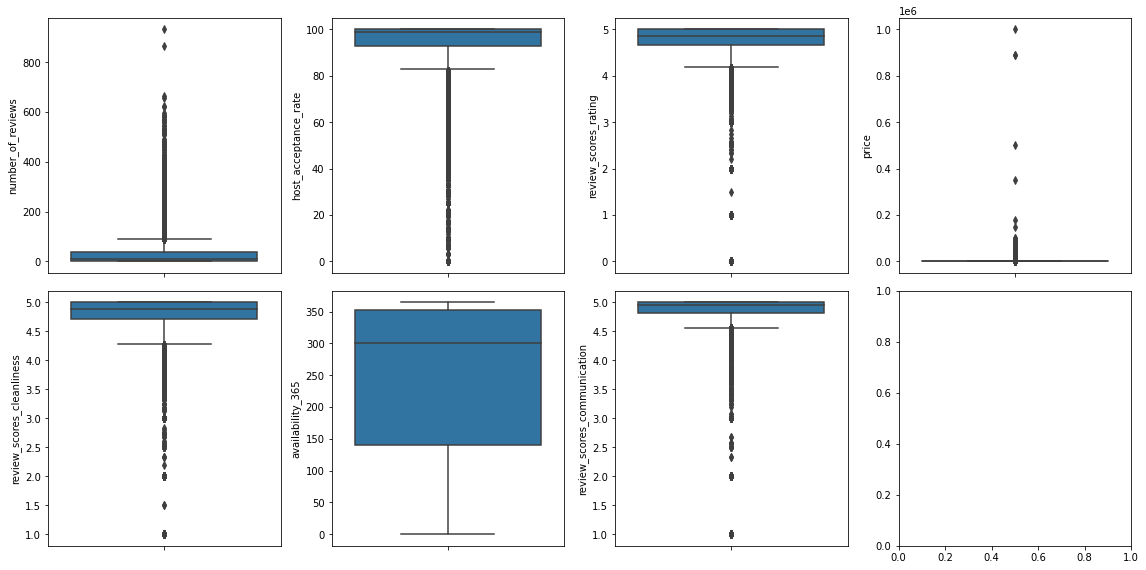

In [14]:
# Veamos distribuciones con Boxplots
columnas = ['number_of_reviews','host_acceptance_rate','review_scores_rating','price','review_scores_cleanliness','availability_365','review_scores_communication']
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(16,8))
index=0
axs=axs.flatten()
for k, v in dfMexico[columnas].items(): # k variable, v valores
  sns.boxplot(y=k, data=dfMexico[columnas], ax=axs[index])
  index += 1
plt.tight_layout(pad=1)

In [15]:
def outliers(df):
    y=df.drop('room_type', axis=1)
    percentile25=y.quantile(0.25) #Q1
    percentile75=y.quantile(0.75) #Q3
    iqr= percentile75 - percentile25

    Limite_Superior_iqr= percentile75 + 3.5*iqr
    Limite_Inferior_iqr= percentile25 - 3.5*iqr
    print("Limite superior permitido", Limite_Superior_iqr)
    print("\nLimite inferior permitido", Limite_Inferior_iqr)

    df2 = y.copy()
    df2 = df2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
    df2 = df2.fillna(round(df.mean(),1))
    df2['room_type'] = df['room_type']
    print('\n',df2.info())
    return df2    

In [16]:
dfMexico = outliers(dfMexico)

Limite superior permitido number_of_reviews               163.000
host_acceptance_rate            124.500
review_scores_rating              6.155
price                          4955.000
review_scores_cleanliness         6.015
availability_365               1098.500
review_scores_communication       5.630
dtype: float64

Limite inferior permitido number_of_reviews              -125.000
host_acceptance_rate             68.500
review_scores_rating              3.515
price                         -2965.000
review_scores_cleanliness         3.695
availability_365               -605.500
review_scores_communication       4.190
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22948 entries, 0 to 22947
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            22948 non-null  float64
 1   host_acceptance_rate         22948 non-null  float32
 2   review_score

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


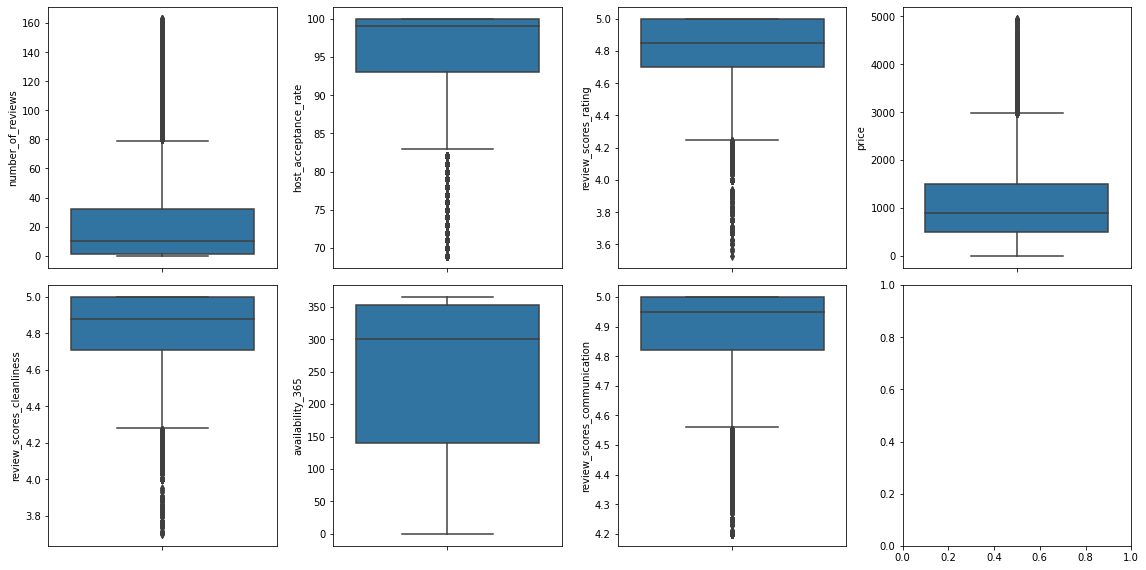

In [17]:
columnas = ['number_of_reviews','host_acceptance_rate','review_scores_rating','price','review_scores_cleanliness','availability_365','review_scores_communication']
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(16,8))
index=0
axs=axs.flatten()
for k, v in dfMexico[columnas].items(): # k variable, v valores
  sns.boxplot(y=k, data=dfMexico[columnas], ax=axs[index])
  index += 1
plt.tight_layout(pad=1)

##Analizar la correlación que existe en cada tipo de habitación respecto a las variables siguientes, utilizando Python y Google Colab, obtener los datos y gráficos requeridos en cada caso.

##Crear el modelo matemático que describa de mejor manera el número de reseñas para cada tipo de alojamiento, utilizando la variable con con mayor correlación.


###Separación

In [20]:
dfMexico.groupby('room_type')['room_type'].count()

room_type
Entire home/apt    14118
Hotel room           172
Private room        8316
Shared room          342
Name: room_type, dtype: int64

In [21]:
def separarAlojamiento(df):
    #Hotel room
    dfE = df[df['room_type'] == 'Entire home/apt']
    #Private room
    dfP = df[df['room_type'] == 'Private room']
    #Shared room
    dfS = df[df['room_type'] == 'Shared room']

    return dfE, dfP, dfS

###Regresión

In [22]:
def rsquared(y_true, y_pred):
    return r2_score(y_true, y_pred)

In [23]:
def regresion(df, var1, var2, c):
    x = np.array(df[var1]).reshape(-1, 1)
    y = np.array(df[var2]).reshape(-1, 1)

    reg = LinearRegression().fit(x, y) #fit = min cuadrados
    y_pred = reg.predict(x)

    R2 = rsquared(y, y_pred)
    SE = y.std() * ((1-R2)**0.5)

    # Graficamos
    fig, ax = plt.subplots()
    ax.set_title(var2 + ' vs ' + var1)
    ax.set_xlabel(var2)
    ax.set_ylabel(var1)

    ax.scatter(x, y, color = c)
    ax.plot(x, y_pred, c='red')
    print('R2: ',R2)
    print('SE: ', SE)

###Correlación

In [18]:
def correlacion(df):
    plt.figure(figsize=(10,4))
    mask = np.triu(np.ones_like(df.corr(),dtype = bool))
    sns.heatmap(df.corr(),annot = True, lw=1, mask=mask, cmap='viridis_r')
    plt.title('Correlation Map')

In [24]:
dfMexicoE, dfMexicoP, dfMexicoS = separarAlojamiento(dfMexico)

###Mexico - Entire Home/Apt

####“number_of_reviews vs host_acceptance_rate”

R2:  0.013377469310791756
SE:  34.30232527974219


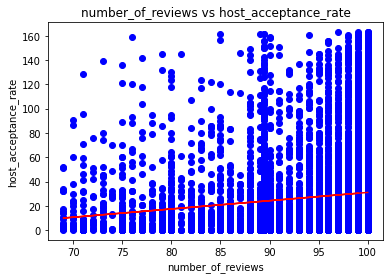

In [25]:
regresion(dfMexicoE, 'host_acceptance_rate', 'number_of_reviews', 'blue')

####“number_of_reviews vs review_scores_rating”


R2:  7.553126484372008e-05
SE:  34.53278815788376


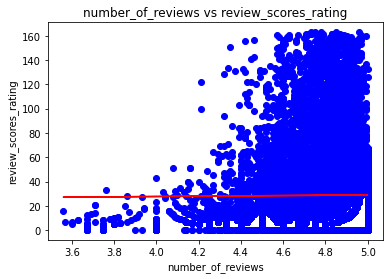

In [26]:
regresion(dfMexicoE, 'review_scores_rating', 'number_of_reviews', 'blue')

####“number_of_reviews vs price”


R2:  0.004499384505072479
SE:  34.45631371659841


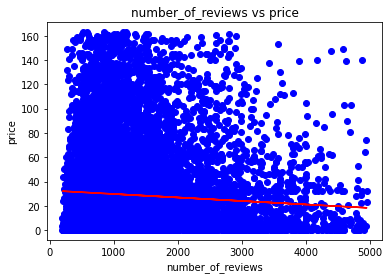

In [27]:
regresion(dfMexicoE, 'price', 'number_of_reviews', 'blue')

####“number_of_reviews vs review_scores_cleanliness”


R2:  0.00012807548196125396
SE:  34.5318808282738


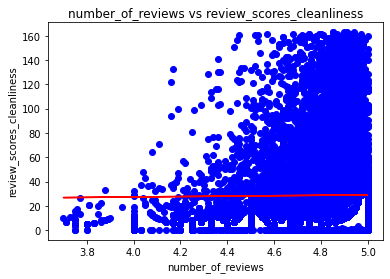

In [28]:
regresion(dfMexicoE, 'review_scores_cleanliness', 'number_of_reviews', 'blue')

####“number_of_reviews vs availability_365”

R2:  0.00684994346730794
SE:  34.415610847474476


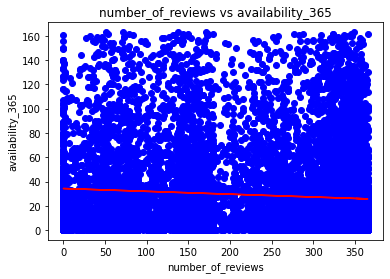

In [29]:
regresion(dfMexicoE, 'availability_365', 'number_of_reviews', 'blue')

####“number_of_reviews vs review_scores_communication”

R2:  0.0010537206086517203
SE:  34.515892946383126


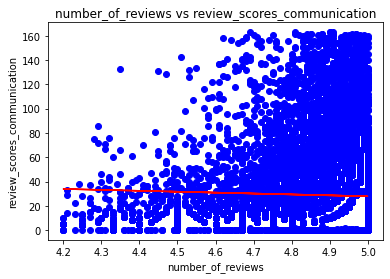

In [30]:
regresion(dfMexicoE, 'review_scores_communication', 'number_of_reviews', 'blue')

####Correlacion

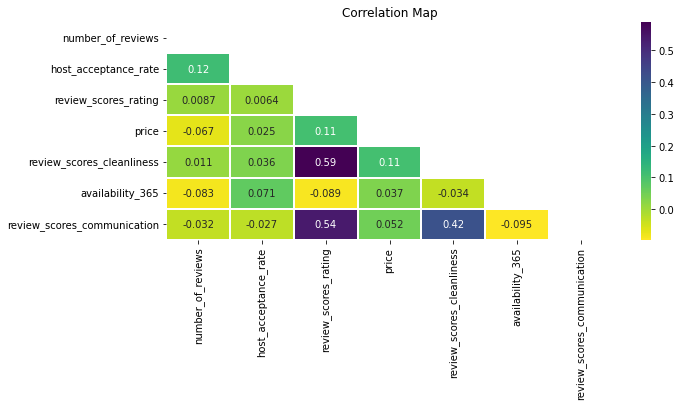

In [43]:
correlacion(dfMexicoE)

###Mexico - Private Room

####“number_of_reviews vs host_acceptance_rate”

R2:  0.009078409298186818
SE:  26.721884876074185


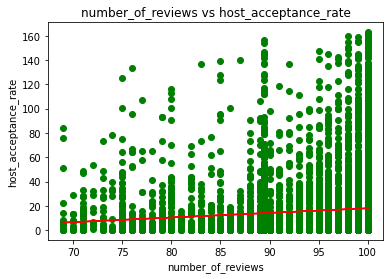

In [31]:
regresion(dfMexicoP, 'host_acceptance_rate', 'number_of_reviews', 'green')

####“number_of_reviews vs review_scores_rating”


R2:  1.911622080075226e-06
SE:  26.843987502197418


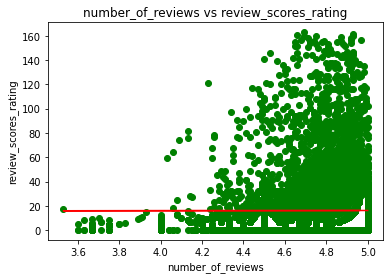

In [32]:
regresion(dfMexicoP, 'review_scores_rating', 'number_of_reviews', 'green')

####“number_of_reviews vs price”


R2:  0.0100476953411065
SE:  26.70881245576298


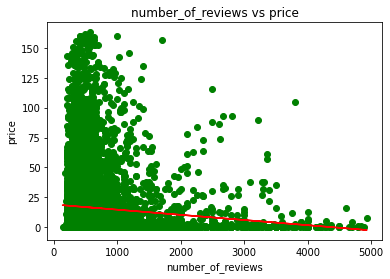

In [33]:
regresion(dfMexicoP, 'price', 'number_of_reviews', 'green')

####“number_of_reviews vs review_scores_cleanliness”


R2:  1.8203328355781423e-07
SE:  26.84401071676178


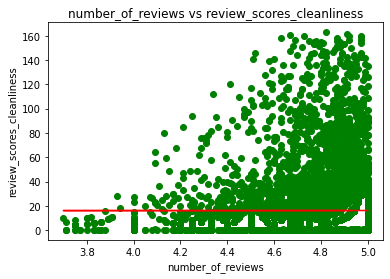

In [34]:
regresion(dfMexicoP, 'review_scores_cleanliness', 'number_of_reviews', 'green')

####“number_of_reviews vs availability_365”

R2:  0.008049049340263625
SE:  26.73576049393369


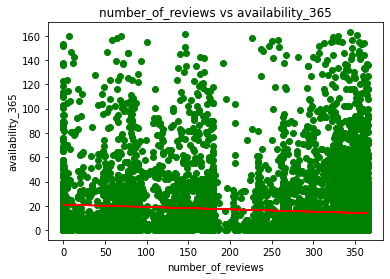

In [35]:
regresion(dfMexicoP, 'availability_365', 'number_of_reviews', 'green')

####“number_of_reviews vs review_scores_communication”

R2:  0.0038489159268182416
SE:  26.792303180307222


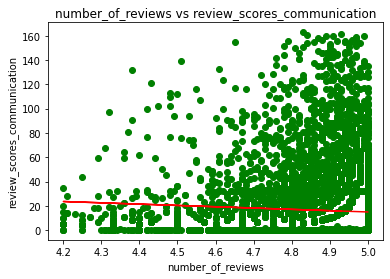

In [44]:
regresion(dfMexicoP, 'review_scores_communication', 'number_of_reviews', 'green')

####Correlacion

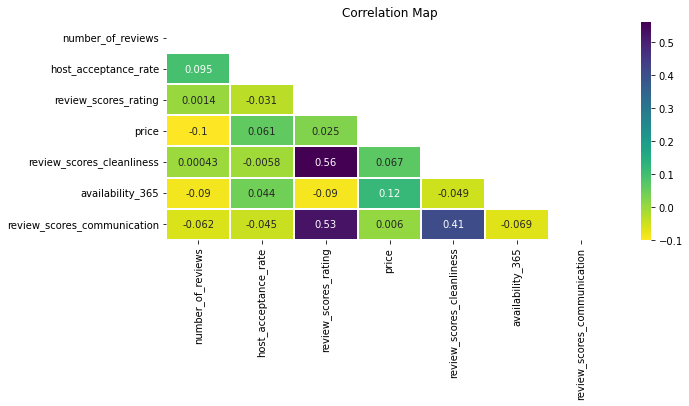

In [45]:
correlacion(dfMexicoP)

###Mexico - Shared Room

####“number_of_reviews vs host_acceptance_rate”

R2:  0.008868225465013313
SE:  16.00113352042503


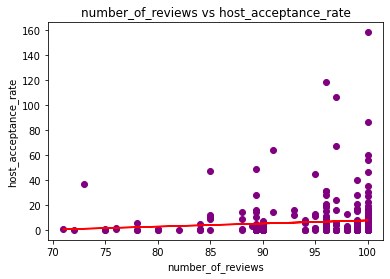

In [37]:
regresion(dfMexicoS, 'host_acceptance_rate', 'number_of_reviews', 'purple')

####“number_of_reviews vs review_scores_rating”


R2:  0.00328076996704485
SE:  16.046172925255004


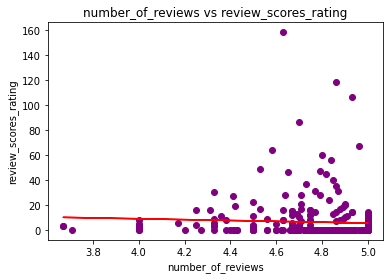

In [38]:
regresion(dfMexicoS, 'review_scores_rating', 'number_of_reviews', 'purple')

####“number_of_reviews vs price”


R2:  0.0065911802149151155
SE:  16.019503631860104


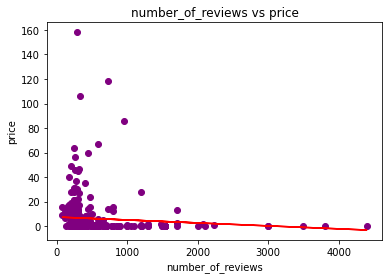

In [39]:
regresion(dfMexicoS, 'price', 'number_of_reviews', 'purple')

####“number_of_reviews vs review_scores_cleanliness”


R2:  0.0034054268113477004
SE:  16.04516946923373


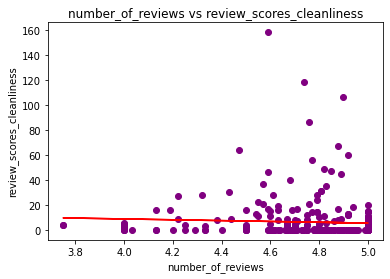

In [40]:
regresion(dfMexicoS, 'review_scores_cleanliness', 'number_of_reviews', 'purple')

####“number_of_reviews vs availability_365”

R2:  0.002176537351238017
SE:  16.055058979718336


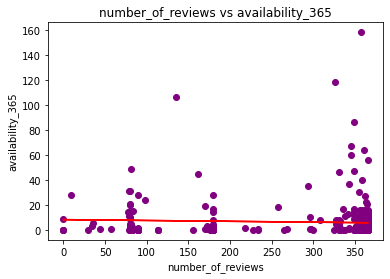

In [41]:
regresion(dfMexicoS, 'availability_365', 'number_of_reviews', 'purple')

####“number_of_reviews vs review_scores_communication”

R2:  0.01523914874500043
SE:  15.94962354756024


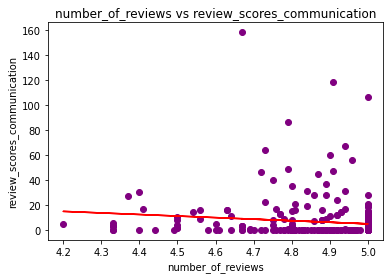

In [42]:
regresion(dfMexicoS, 'review_scores_communication', 'number_of_reviews', 'purple')

####Correlacion

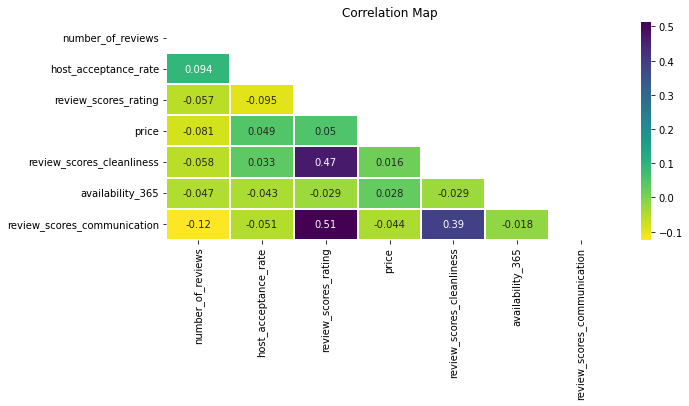

In [46]:
correlacion(dfMexicoS)

##Realizar una tabla de todos los coeficientes de determinación y correlación obtenidos para cada tipo de habitación.


###México - Entire Home

- “number_of_reviews vs host_acceptance_rate”
    - Correlación:
    - R2:
- “number_of_reviews  vs review_scores_rating”
    - Correlación:
    - R2:
- “number_of_reviews  vs price”
    - Correlación:
    - R2:
- “number_of_reviews  vs review_scores_cleanliness”
    - Correlación:
    - R2:
- “number_of_reviews  vs availability_365”
    - Correlación:
    - R2:
- “number_of_reviews  vs review_scores_communication”
    - Correlación:
    - R2:

###México - Private Room

- “number_of_reviews vs host_acceptance_rate”
    - Correlación:
    - R2:
- “number_of_reviews  vs review_scores_rating”
    - Correlación:
    - R2:
- “number_of_reviews  vs price”
    - Correlación:
    - R2:
- “number_of_reviews  vs review_scores_cleanliness”
    - Correlación:
    - R2:
- “number_of_reviews  vs availability_365”
    - Correlación:
    - R2:
- “number_of_reviews  vs review_scores_communication”
    - Correlación:
    - R2:

###México - Shared Room

- “number_of_reviews vs host_acceptance_rate”
    - Correlación:
    - R2:
- “number_of_reviews  vs review_scores_rating”
    - Correlación:
    - R2:
- “number_of_reviews  vs price”
    - Correlación:
    - R2:
- “number_of_reviews  vs review_scores_cleanliness”
    - Correlación:
    - R2:
- “number_of_reviews  vs availability_365”
    - Correlación:
    - R2:
- “number_of_reviews  vs review_scores_communication”
    - Correlación:
    - R2:

##Implementar el mismo análisis para 2 ciudades de tu elección


##Crear los archivos requeridos en Google Colab y respaldarlos en GitHub.


###Generar un reporte comparativo sobre el comportamiento de las ciudades elegidas respecto al D.F
###Subir el link del repositorio en CANVAS para “Evaluación”